# CWE by Research Concepts - Cluster Visualization


In [ ]:
#
# t-SNE and PCA visualization implementation derived from
# https://jrtechs.net/data-science/word-embeddings-part-2
#

In [8]:
import numpy
import pandas as pd

X = numpy.stack(
    pd.read_hdf('LO_SARD102_CweCluster_word2vec.h5', key='X').word2vec_avg,
    axis=0
)
print("X:", X.shape)

X: (23003, 100)


In [7]:
researchconcepts = [284, 435, 664, 682, 691, 693, 697, 703, 707, 710]

y = numpy.array(pd.read_hdf('LO_SARD102_CweCluster_word2vec.h5', key='y'))
# delete CWE clusters w/o any examples
_y = pd.DataFrame(y, columns=researchconcepts)
_y = _y.loc[:, (_y != 0).any(axis=0)]
researchconcepts = list(_y.columns)
y = _y.values

print("Research Concepts CWE:", researchconcepts)
print("y:", y.shape)

Research Concepts CWE: [664, 682, 691, 693, 697, 707, 710]
y: (23003, 7)


In [5]:
# only use samples that are only member of one cluster
indices_singleClusterFit = numpy.array(_y.T.sum().loc[_y.T.sum() == 1].index)
X_singleClusterFit = X[indices_singleClusterFit]
y_singleClusterFit = y[indices_singleClusterFit]
print(X_singleClusterFit.shape)
print(y_singleClusterFit.shape)
y_singleClusterFit = y_singleClusterFit.argmax(axis=1)

(9859, 100)
(9859, 7)


In [32]:
def plot_with_matplotlib(x_vals, y_vals, labels, num_annotate=0, filename=None):
    import matplotlib.pyplot as plt
    color_map = ['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'black']
    label_color = [color_map[l] for l in labels]
 
    plt.figure(figsize=(12,12))
    plt.scatter(x_vals, y_vals, s=10, c=label_color)
    
    if filename is not None:
        plt.savefig(filename)
    plt.show()

## t-SNE

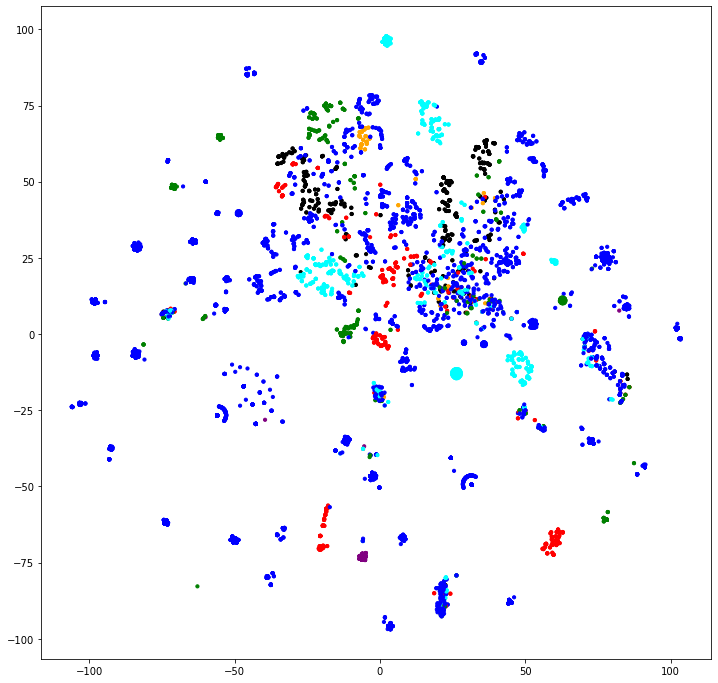

In [33]:
def reduce_w_tSNE(_vectors):
    from sklearn.decomposition import IncrementalPCA    # inital reduction
    from sklearn.manifold import TSNE                   # final reduction
    
    # reduce using t-SNE
    vectors = numpy.asarray(_vectors)
    tsne = TSNE(n_components=2, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals

x_vals, y_vals = reduce_w_tSNE(X_singleClusterFit)
plot_with_matplotlib(x_vals, y_vals, y_singleClusterFit)

## t-SNE 3D

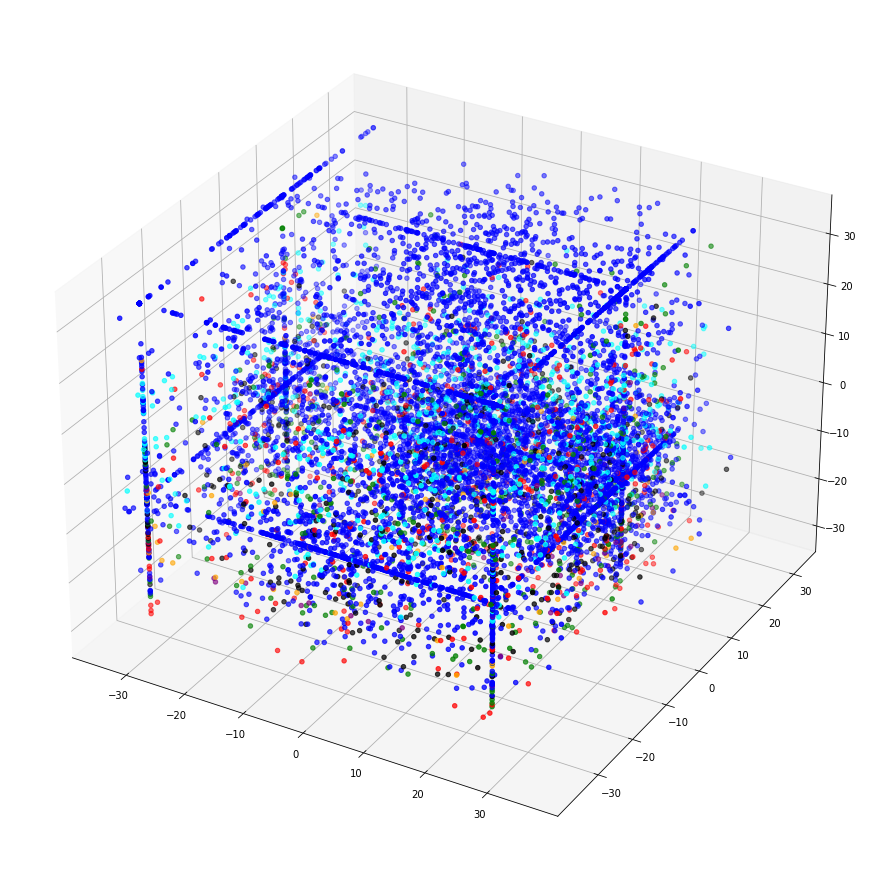

In [31]:
def reduce_w_tSNE_3d(_vectors):
    from sklearn.decomposition import IncrementalPCA    # inital reduction
    from sklearn.manifold import TSNE                   # final reduction
    
    # reduce using t-SNE
    vectors = numpy.asarray(_vectors)
    tsne = TSNE(n_components=3, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    z_vals = [v[2] for v in vectors]
    return x_vals, y_vals, z_vals


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)

x_vals, y_vals, z_vals = reduce_w_tSNE_3d(X_singleClusterFit)

random.shuffle(x_vals)
random.shuffle(y_vals)
random.shuffle(y_vals)

color_map = ['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'black']
label_color = [color_map[l] for l in y_singleClusterFit]
    
ax.scatter(x_vals, y_vals, z_vals, c=label_color)
plt.show()

## PCA

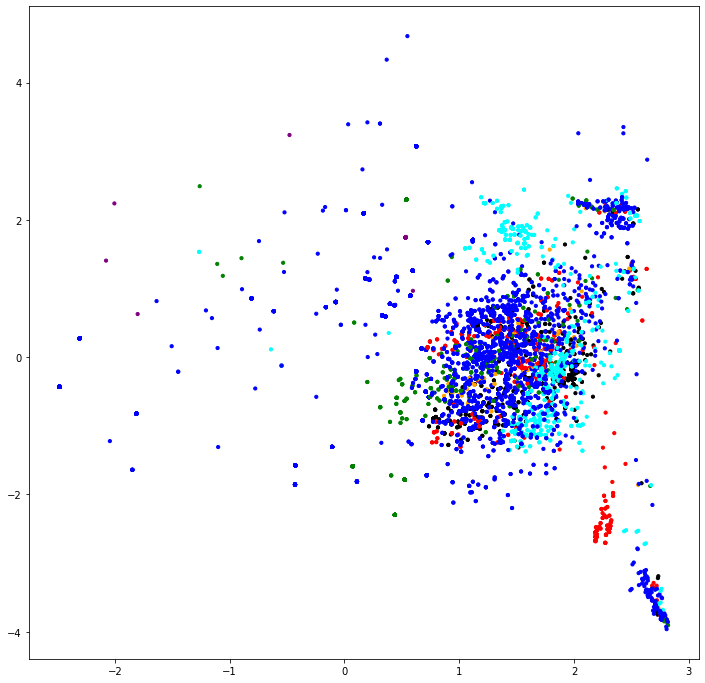

In [34]:
def reduce_w_PCA(_vectors):
    from sklearn.decomposition import PCA   
    vectors = PCA(n_components=2).fit_transform(_vectors)
    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals

x_vals, y_vals = reduce_w_PCA(X_singleClusterFit)
plot_with_matplotlib(x_vals, y_vals, y_singleClusterFit)

## PCA 3D

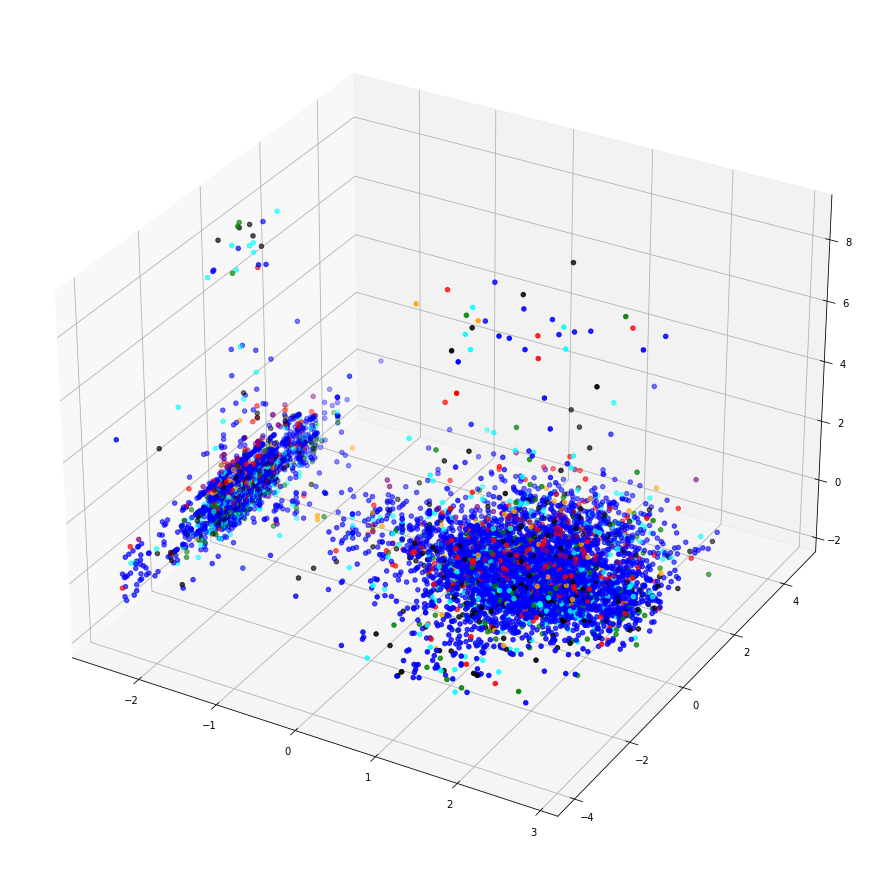

In [35]:
def reduce_w_PCA_3d(_vectors):
    from sklearn.decomposition import PCA   
    vectors = PCA(n_components=3).fit_transform(_vectors)
    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    z_vals = [v[2] for v in vectors]
    return x_vals, y_vals, z_vals

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)

x_vals, y_vals, z_vals = reduce_w_PCA_3d(X_singleClusterFit)

random.shuffle(x_vals)
random.shuffle(y_vals)
random.shuffle(y_vals)

color_map = ['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'black']
label_color = [color_map[l] for l in y_singleClusterFit]
    
ax.scatter(x_vals, y_vals, z_vals, c=label_color)
plt.show()